In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import akita_utils_forplotting as utils
import numpy as np
import pandas as pd
import sys
import os, psutil
import time 
import matplotlib.pyplot as plt

from optparse import OptionParser


nt = ['A', 'T', 'C', 'G']

2023-07-31 13:10:57.883312: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-31 13:10:57.883347: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-31 13:11:02.451871: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-31 13:11:02.451976: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-31 13:11:02.452006: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ruby.gladstone.internal): /proc/driver/nvidia/version does not exist
2023-07-31 13:11:02.452203: I tensorflow/core/platfor

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence (InputLayer)          [(None, 1048576, 4)  0           []                               
                                ]                                                                 
                                                                                                  
 stochastic_reverse_complement   ((None, 1048576, 4)  0          ['sequence[0][0]']               
 (StochasticReverseComplement)  , ())                                                             
                                                                                                  
 stochastic_shift (StochasticSh  (None, 1048576, 4)  0           ['stochastic_reverse_complement[0
 ift)                                                            ][0]']                     

                                                                                                  
 re_lu_8 (ReLU)                 (None, 4096, 96)     0           ['max_pooling1d_7[0][0]']        
                                                                                                  
 conv1d_8 (Conv1D)              (None, 4096, 96)     46080       ['re_lu_8[0][0]']                
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 4096, 96)    384         ['conv1d_8[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 max_pooling1d_8 (MaxPooling1D)  (None, 2048, 96)    0           ['batch_normalization_8[0][0]']  
                                                                                                  
 re_lu_9 (

 add_2 (Add)                    (None, 512, 96)      0           ['add_1[0][0]',                  
                                                                  'dropout_2[0][0]']              
                                                                                                  
 re_lu_17 (ReLU)                (None, 512, 96)      0           ['add_2[0][0]']                  
                                                                                                  
 conv1d_17 (Conv1D)             (None, 512, 48)      13824       ['re_lu_17[0][0]']               
                                                                                                  
 batch_normalization_17 (BatchN  (None, 512, 48)     192         ['conv1d_17[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_18 

 batch_normalization_25 (BatchN  (None, 512, 48)     192         ['conv1d_25[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_26 (ReLU)                (None, 512, 48)      0           ['batch_normalization_25[0][0]'] 
                                                                                                  
 conv1d_26 (Conv1D)             (None, 512, 96)      4608        ['re_lu_26[0][0]']               
                                                                                                  
 batch_normalization_26 (BatchN  (None, 512, 96)     384         ['conv1d_26[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 dropout_7

                                                                                                  
 batch_normalization_32 (BatchN  (None, 512, 512, 48  192        ['conv2d_4[0][0]']               
 ormalization)                  )                                                                 
                                                                                                  
 dropout_9 (Dropout)            (None, 512, 512, 48  0           ['batch_normalization_32[0][0]'] 
                                )                                                                 
                                                                                                  
 add_9 (Add)                    (None, 512, 512, 48  0           ['symmetrize2d_1[0][0]',         
                                )                                 'dropout_9[0][0]']              
                                                                                                  
 symmetriz

 ormalization)                  )                                                                 
                                                                                                  
 dropout_12 (Dropout)           (None, 512, 512, 48  0           ['batch_normalization_38[0][0]'] 
                                )                                                                 
                                                                                                  
 add_12 (Add)                   (None, 512, 512, 48  0           ['symmetrize2d_4[0][0]',         
                                )                                 'dropout_12[0][0]']             
                                                                                                  
 symmetrize2d_5 (Symmetrize2D)  (None, 512, 512, 48  0           ['add_12[0][0]']                 
                                )                                                                 
          

In [3]:
#file_path='/pollard/data/projects/shzhang_rotation/somatic_variants/somatic_structural_variants/'

#vcf_path= file_path+ '02dc6e6c-1baf-4f43-8360-d4950838a63a.somaticSV.vcf.gz'

# #input_dir=options.in_dir
input_dir='/pollard/home/shzhang/akita/results/20230326/bedpe/'


#vcf_name='02dc6e6c-1baf-4f43-8360-d4950838a63a.somaticSV.vcf.gz'
vcf_name='35c87b1a-eea4-4841-bed3-4c9591f5f417.somaticSV.bedpe'
vcf_path=input_dir + vcf_name
print(vcf_path)


/pollard/home/shzhang/akita/results/20230326/bedpe/35c87b1a-eea4-4841-bed3-4c9591f5f417.somaticSV.bedpe


In [4]:
# Read variants 
variants = pd.read_csv(vcf_path, sep='\t')
#print('num SVs:' + str(len(variants)))
print('Sample {} has {} SVs'.format(vcf_name, str(len(variants))))

variants['SVTYPE']=variants['INFO_A'].str.extract('SVTYPE=(.*?)\;')


#subset to non BND since BND are taken care of 
#variants=variants[variants.TYPE != 'BND']
variants=variants[variants.TYPE =='DUP']
variants=variants[variants.SPAN >5e4]
variants=variants[variants.SPAN <5e5]

#variants=variants[variants.SVTYPE != 'BND']
variants = variants.reset_index(drop=True)
#pd.to_numeric(variants['MSE'])
#variants=variants[variants.MSE >0.5]
#variants[variants.]
#variants[variants.START_B==14981062]
variants


Sample 35c87b1a-eea4-4841-bed3-4c9591f5f417.somaticSV.bedpe has 612 SVs


,CHROM_A,START_A,END_A,CHROM_B,START_B,END_B,ID,QUAL,STRAND_A,STRAND_B,...,uuid,MSE,MSE_left,MSE_right,CORR,CORR_left,CORR_right,samp1_id,samp2_id,SVTYPE
0,3,67903733,67903733,3,68076877,68076877,MantaDUP:TANDEM:189363:0:2:0:0:0,.,+,-,...,35c87b1a-eea4-4841-bed3-4c9591f5f417.somaticSV...,0.0342585520446603,0.0217049590840914,0.0192667929422207,0.511375342047336,0.653443967978323,0.707006262173747,BS_84QXT7FR,BS_CKY2TTXG,DUP
1,3,91115241,91115241,3,91184925,91184925,MantaDUP:TANDEM:10:31987:39492:0:0:0,.,+,-,...,35c87b1a-eea4-4841-bed3-4c9591f5f417.somaticSV...,NaN,NaN,NaN,NaN,NaN,NaN,BS_84QXT7FR,BS_CKY2TTXG,DUP
2,4,143858890,143858890,4,144083017,144083017,MantaDUP:TANDEM:179690:0:2:0:0:0,.,+,-,...,35c87b1a-eea4-4841-bed3-4c9591f5f417.somaticSV...,0.135162870660493,0.107888453772663,0.121486329370167,0.471154207982784,0.57422305893619,0.61020685430558,BS_84QXT7FR,BS_CKY2TTXG,DUP
3,6,32477759,32477759,6,32565562,32565562,MantaDUP:TANDEM:42455:1:4:1:0:0,.,+,-,...,35c87b1a-eea4-4841-bed3-4c9591f5f417.somaticSV...,0.093612938785341,0.0883883326615251,0.0961715929039637,0.813354474963286,0.840866684661525,0.810842516079288,BS_84QXT7FR,BS_CKY2TTXG,DUP
4,6,32513602,32513602,6,32575780,32575780,MantaDUP:TANDEM:4122:6:18:2:0:0,.,+,-,...,35c87b1a-eea4-4841-bed3-4c9591f5f417.somaticSV...,0.0599745336283463,0.0603703702324341,0.0521179495124408,0.908349545407981,0.907596540528798,0.923733551543793,BS_84QXT7FR,BS_CKY2TTXG,DUP
5,6,32667692,32667692,6,32764602,32764602,MantaDUP:TANDEM:16183:50:53:1:0:0,.,+,-,...,35c87b1a-eea4-4841-bed3-4c9591f5f417.somaticSV...,0.0991723027334267,0.0866244066484502,0.103702842311279,0.831602524091835,0.843561472506238,0.818883811239141,BS_84QXT7FR,BS_CKY2TTXG,DUP
6,14,106143106,106143106,14,106532108,106532108,MantaDUP:TANDEM:32930:10:19:0:0:0,.,+,-,...,35c87b1a-eea4-4841-bed3-4c9591f5f417.somaticSV...,0.0251698542975951,0.0233578300431759,0.0122132166657858,0.809260196724069,0.849223384631712,0.920930142671912,BS_84QXT7FR,BS_CKY2TTXG,DUP
7,15,24101864,24101864,15,24477976,24477976,MantaDUP:TANDEM:78045:0:1:0:0:0,.,+,-,...,35c87b1a-eea4-4841-bed3-4c9591f5f417.somaticSV...,0.0028041532734901,0.0045512751931846,0.0030305757616514,0.979954476674734,0.973348965000841,0.981126175285088,BS_84QXT7FR,BS_CKY2TTXG,DUP
8,19,40940331,40940331,19,41008224,41008224,MantaDUP:TANDEM:99663:0:1:0:0:0,.,+,-,...,35c87b1a-eea4-4841-bed3-4c9591f5f417.somaticSV...,0.101722982636608,0.0805671806174473,0.0706556385777836,0.767668616497619,0.803354157029,0.831741947692507,BS_84QXT7FR,BS_CKY2TTXG,DUP
9,22,27806974,27806974,22,27867278,27867278,MantaDUP:TANDEM:110866:4:6:0:1:0,.,+,-,...,35c87b1a-eea4-4841-bed3-4c9591f5f417.somaticSV...,0.0640551814757785,0.05412666699559,0.0521967332248509,0.890157652520207,0.90020161163582,0.903731080246329,BS_84QXT7FR,BS_CKY2TTXG,DUP


In [ ]:
i=2


#2 is lopsided
#3 is not 

 # Get info on variant
variant = variants.loc[i]

CHR = 'chr'+variant.CHROM_A
POS = variant.START_A
REF = variant.REF_A
ALT = variant.ALT_A
SVTYPE = variant.TYPE
END= (int(variant.END_B)) if SVTYPE!='BND' else np.nan
print(variant.SPAN)

#print(variant)

    
    
if all([x in nt for x in ALT]):
    REF_mat, ALT_mat  = utils.get_scores(CHR, POS, REF, ALT, SVTYPE, shift='none')
    #MSE_left, CORR_left, MSE_track_left, CORR_track_left = utils.get_scores(CHR, POS, REF, ALT, SVTYPE, shift='left')
    #MSE_right, CORR_right, MSE_track_right, CORR_track_right = utils.get_scores(CHR, POS, REF, ALT, SVTYPE, shift='right')


else:
    #tracks are  of shape (448,)
    #for each sample need to return (448 x 6 x n) array 
    REF_mat, ALT_mat, REF_mat_before, ALT_mat_before = utils.get_scores_SV(CHR, POS, ALT, END, SVTYPE, shift='none')
    #MSE_left, CORR_left, MSE_track_left, CORR_track_left = utils.get_scores_SV(CHR, POS, ALT, END, SVTYPE, shift='left')
    #MSE_right, CORR_right, MSE_track_right, CORR_track_right = utils.get_scores_SV(CHR, POS, ALT, END, SVTYPE, shift='right')
        

        


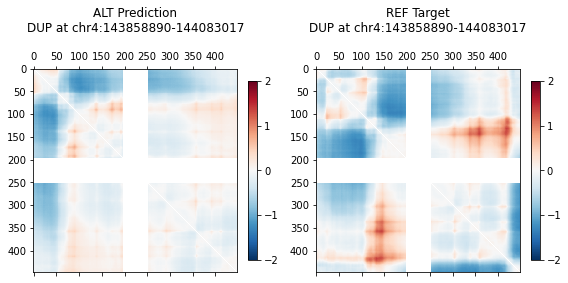

In [7]:
        
plt.figure(figsize=(8,4))
target_index = 0
vmin=-2; vmax=2



plt.subplot(121) 
im = plt.matshow(ALT_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
plt.title('ALT Prediction' + '\n' + '{} at {}:{}-{}'.format(SVTYPE, CHR, POS, END),y=1.15 )
#plt.title('pred test',y=1.15 )

#plt.ylabel(myseq_str)

# plot target 
plt.subplot(122) 
im = plt.matshow(REF_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
#plt.title( 'target-'+str(hic_num_to_name_dict[target_index]),y=1.15)
plt.title('REF Target' + '\n' + '{} at {}:{}-{}'.format(SVTYPE, CHR, POS, END),y=1.15 )



plt.tight_layout()
#plt.show()
#plt.savefig('/pollard/home/shzhang/akita/figs/del_mask_schematic.pdf', dpi=300)   # save the figure to file

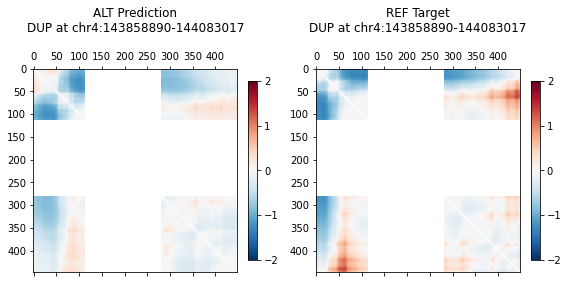

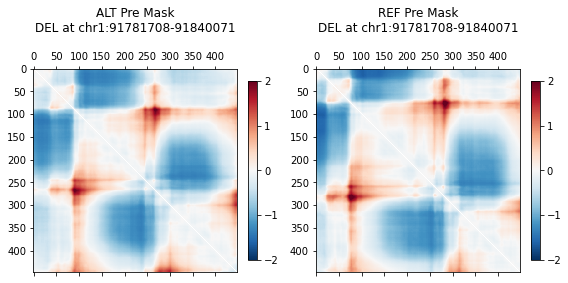

In [38]:
plt.figure(figsize=(8,4))
target_index = 0
vmin=-2; vmax=2


plt.subplot(121) 
im = plt.matshow(ALT_mat_before, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
#plt.title( 'target-'+str(hic_num_to_name_dict[target_index]),y=1.15)
plt.title('ALT Pre Mask' + '\n' + '{} at {}:{}-{}'.format(SVTYPE, CHR, POS, END),y=1.15 )

plt.subplot(122) 
im = plt.matshow(REF_mat_before, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
#plt.title( 'target-'+str(hic_num_to_name_dict[target_index]),y=1.15)
plt.title('REF Pre Mask' + '\n' + '{} at {}:{}-{}'.format(SVTYPE, CHR, POS, END),y=1.15 )



plt.tight_layout()
plt.savefig('/pollard/home/shzhang/akita/figs/del_mask_schematic_premask.pdf', dpi=300)   # save the figure to file



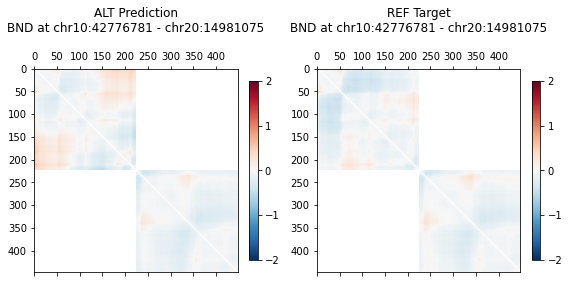

In [128]:
#THIS ONE FOR BND

plt.figure(figsize=(8,4))
target_index = 0
vmin=-2; vmax=2



plt.subplot(121) 
im = plt.matshow(REF_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
plt.title('ALT Prediction' + '\n' + '{} at {}:{} - chr{}:{}'.format(SVTYPE, CHR, POS, variant.CHROM_B, variant.END_B),y=1.15 )
#plt.title('pred test',y=1.15 )

#plt.ylabel(myseq_str)

# plot target 
plt.subplot(122) 
im = plt.matshow(ALT_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
#plt.title( 'target-'+str(hic_num_to_name_dict[target_index]),y=1.15)
plt.title('REF Target' + '\n' + '{} at {}:{} - chr{}:{}'.format(SVTYPE, CHR, POS, variant.CHROM_B, variant.END_B),y=1.15 )


plt.tight_layout()
#plt.show()
plt.savefig('/pollard/home/shzhang/akita/figs/35c87b1a_bnd.pdf', dpi=300)   # save the figure to file

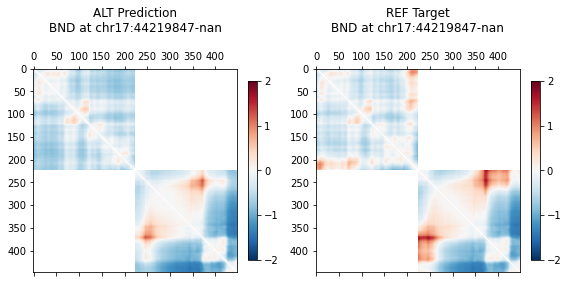

In [106]:
plt.figure(figsize=(8,4))
target_index = 0
vmin=-2; vmax=2



plt.subplot(121) 
im = plt.matshow(REF_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
plt.title('ALT Prediction' + '\n' + '{} at {}:{}-{}'.format(SVTYPE, CHR, POS, END),y=1.15 )
#plt.title('pred test',y=1.15 )

#plt.ylabel(myseq_str)

# plot target 
plt.subplot(122) 
im = plt.matshow(ALT_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
#plt.title( 'target-'+str(hic_num_to_name_dict[target_index]),y=1.15)
plt.title('REF Target' + '\n' + '{} at {}:{}-{}'.format(SVTYPE, CHR, POS, END),y=1.15 )


plt.tight_layout()
#plt.show()
plt.savefig('/pollard/home/shzhang/akita/figs/54d32c7c_bnd.pdf', dpi=300)   # save the figure to file

<Figure size 432x288 with 0 Axes>